### Read the Data

In [14]:
import pandas as pd
from sklearn import preprocessing

In [187]:
dataset_path = './iris/iris.data'
df = pd.read_csv(dataset_path, names=['sepal_length','sepal_width','petal_length','petal_width','target'])

In [188]:
df

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
154,6.3,2.5,5.0,1.9,Iris-virginica
155,6.5,3.0,5.2,2.0,Iris-virginica
156,6.5,3.0,5.2,2.0,NaN
157,6.2,3.4,5.4,2.3,Iris-virginica


In [189]:
print(df.isna().sum())

sepal_length    2
sepal_width     0
petal_length    2
petal_width     3
target          3
dtype: int64


In [190]:
df = df.dropna().reset_index()
df

,index,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,Iris-setosa
1,1,4.9,3.0,1.4,0.2,Iris-setosa
2,2,4.7,3.2,1.3,0.2,Iris-setosa
3,3,4.6,3.1,1.5,0.2,Iris-setosa
4,4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,153,6.7,3.0,5.2,2.3,Iris-virginica
146,154,6.3,2.5,5.0,1.9,Iris-virginica
147,155,6.5,3.0,5.2,2.0,Iris-virginica
148,157,6.2,3.4,5.4,2.3,Iris-virginica


In [191]:
print(df.isna().sum())

index           0
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
target          0
dtype: int64


In [131]:
df['target'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [132]:
le = preprocessing.LabelEncoder()

In [133]:
df['target'] = le.fit_transform(df['target'])
df

,index,sepal_length,sepal_width,petal_length,petal_width,target
0,0,5.1,3.5,1.4,0.2,0
1,1,4.9,3.0,1.4,0.2,0
2,2,4.7,3.2,1.3,0.2,0
3,3,4.6,3.1,1.5,0.2,0
4,4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,153,6.7,3.0,5.2,2.3,2
146,154,6.3,2.5,5.0,1.9,2
147,155,6.5,3.0,5.2,2.0,2
148,157,6.2,3.4,5.4,2.3,2


### Mean and Variance Before

In [134]:
var1 = df.var().drop(['index'])
mean1 = df.mean().drop(['index'])

In [135]:
var1


sepal_length    0.685694
sepal_width     0.188004
petal_length    3.113179
petal_width     0.582414
target          0.671141
dtype: float64

In [136]:
mean1

sepal_length    5.843333
sepal_width     3.054000
petal_length    3.758667
petal_width     1.198667
target          1.000000
dtype: float64

In [138]:
scaled_features = preprocessing.StandardScaler().fit_transform(df[['sepal_length', 'sepal_width', 
                                                                  'petal_length', 'petal_width']].values)
scaled_features.shape

(150, 4)

In [143]:
scaled_features_df = pd.DataFrame(scaled_features, index=df[['sepal_length', 'sepal_width', 
                                                                  'petal_length', 'petal_width']].index, columns=df[['sepal_length', 'sepal_width', 
                                                                  'petal_length', 'petal_width']].columns)
scaled_features_df['target'] = df['target']

In [144]:
scaled_features_df

,sepal_length,sepal_width,petal_length,petal_width,target
0,-0.900681,1.032057,-1.341272,-1.312977,0
1,-1.143017,-0.124958,-1.341272,-1.312977,0
2,-1.385353,0.337848,-1.398138,-1.312977,0
3,-1.506521,0.106445,-1.284407,-1.312977,0
4,-1.021849,1.263460,-1.341272,-1.312977,0
...,...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956,2
146,0.553333,-1.281972,0.705893,0.922064,2
147,0.795669,-0.124958,0.819624,1.053537,2
148,0.432165,0.800654,0.933356,1.447956,2


### Mean and Variance After

In [145]:
var2 = scaled_features_df.var()
mean2 = scaled_features_df.mean()

In [146]:
var2

sepal_length    1.006711
sepal_width     1.006711
petal_length    1.006711
petal_width     1.006711
target          0.671141
dtype: float64

In [147]:
mean2

sepal_length   -4.736952e-16
sepal_width    -6.631732e-16
petal_length    3.315866e-16
petal_width    -2.842171e-16
target          1.000000e+00
dtype: float64

### PCA

In [148]:
from sklearn.decomposition import PCA
from pandas import DataFrame

In [155]:
pca = PCA(n_components=2)

In [156]:
pca.fit(scaled_features_df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

PCA(n_components=2)

In [160]:
df_pca = DataFrame(pca.transform(scaled_features_df[['sepal_length', 'sepal_width', 
                                                    'petal_length', 'petal_width']]), columns=['pca_1', 'pca_2'])

df_pca['target'] = df['target']
df_pca.head()

,pca_1,pca_2,target
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0


In [161]:
df_pca

,pca_1,pca_2,target
0,-2.264542,0.505704,0
1,-2.086426,-0.655405,0
2,-2.367950,-0.318477,0
3,-2.304197,-0.575368,0
4,-2.388777,0.674767,0
...,...,...,...
145,1.870522,0.382822,2
146,1.558492,-0.905314,2
147,1.520845,0.266795,2
148,1.376391,1.016362,2


### Plot

In [162]:
import matplotlib.pyplot as plt

In [ ]:
df_pca.plot(kind='scatter',x='pca_1',y='pca_2')
plt.show()

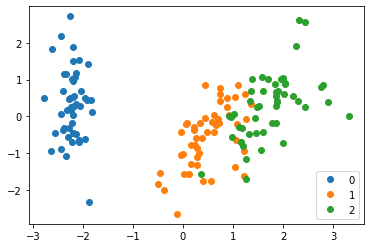

In [180]:
groups = df_pca.groupby("target")
for name, group in groups:
    plt.plot(group["pca_1"], group["pca_2"], marker="o", linestyle="", label=name)
plt.legend()

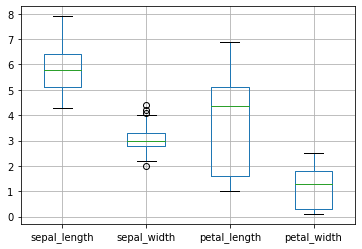

In [182]:
boxplot1 = df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 

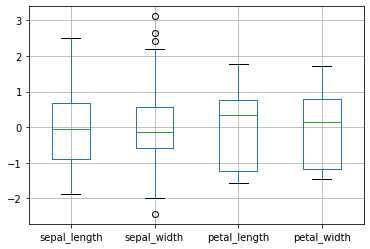

In [183]:
boxplot2 = scaled_features_df.boxplot(column=['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 